In [ ]:
!pip install vecstack


In [ ]:
from vecstack import stacking
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score #works
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC




In [ ]:
#Read training data file
#trainfile = '/content/drive/MyDrive/NewHomesiteTrain.csv'
trainfile = '/content/drive/MyDrive/RevisedHomesiteTrain1.csv'
trainData = pd.read_csv(trainfile)

#Read test data file
#testfile = '/content/drive/MyDrive/NewHomesiteTest.csv'
testfile = '/content/drive/MyDrive/RevisedHomesiteTest1.csv'
testData = pd.read_csv(testfile)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(trainData.shape)
print(testData.shape)

(65000, 596)
(173836, 596)


In [ ]:
trainData.head()

,CoverageField11A,CoverageField11B,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,...,PropertyField38_N,PropertyField38_Y,GeographicField63_,GeographicField63_N,GeographicField63_Y,GeographicField64_CA,GeographicField64_IL,GeographicField64_NJ,GeographicField64_TX,QuoteConversion_Flag
0,2,1,17,23,17,23,15,22,16,22,...,1,0,0,1,0,1,0,0,0,0
1,5,9,6,8,6,8,5,7,5,8,...,1,0,0,1,0,0,0,1,0,0
2,4,6,7,12,7,12,6,10,7,11,...,1,0,0,1,0,0,0,1,0,0
3,15,23,3,2,3,2,2,2,3,2,...,1,0,0,1,0,0,0,0,1,0
4,4,6,8,13,8,13,7,11,7,13,...,1,0,0,1,0,0,1,0,0,0


In [ ]:
testData = testData.drop('GeographicField64', axis=1)

In [ ]:
testData.head()

,CoverageField11A,CoverageField11B,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,...,PropertyField37_Y,PropertyField38_N,PropertyField38_Y,GeographicField63_,GeographicField63_N,GeographicField63_Y,GeographicField64_CA,GeographicField64_IL,GeographicField64_NJ,GeographicField64_TX
0,13,22,4,4,4,4,3,3,3,4,...,1,1,0,0,0,1,0,0,0,0
1,4,5,8,14,8,14,7,12,8,13,...,0,1,0,0,1,0,0,0,0,0
2,3,3,11,18,11,18,10,16,10,18,...,0,1,0,0,1,0,0,0,0,0
3,5,9,14,22,15,22,13,20,22,25,...,0,1,0,0,1,0,0,0,0,0
4,12,21,4,5,4,5,4,4,4,5,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
print(trainData.isnull().sum())
print(testData.isnull().sum())

CoverageField11A        0
CoverageField11B        0
CoverageField1A         0
CoverageField1B         0
CoverageField2A         0
                       ..
GeographicField64_CA    0
GeographicField64_IL    0
GeographicField64_NJ    0
GeographicField64_TX    0
QuoteConversion_Flag    0
Length: 596, dtype: int64
CoverageField11A        0
CoverageField11B        0
CoverageField1A         0
CoverageField1B         0
CoverageField2A         0
                       ..
GeographicField63_Y     0
GeographicField64_CA    0
GeographicField64_IL    0
GeographicField64_NJ    0
GeographicField64_TX    0
Length: 595, dtype: int64


In [ ]:
# Split dataset
Xtrain = trainData.drop("QuoteConversion_Flag", axis=1)
Ytrain = trainData["QuoteConversion_Flag"]
print(Ytrain.value_counts())
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = .20, random_state = 7)


0    52738
1    12262
Name: QuoteConversion_Flag, dtype: int64


In [ ]:
smote = SMOTE(sampling_strategy = 1)
x_res, y_res = smote.fit_resample(X_train, Y_train)
print(y_res.value_counts())

1    42135
0    42135
Name: QuoteConversion_Flag, dtype: int64


In [ ]:
dt = DecisionTreeClassifier(random_state = 7)
dt.fit(x_res, y_res)
dt_pred = dt.predict(X_test)
#Model Accuracy
print("Accuracy:", accuracy_score(Y_test, dt_pred))
print("Precision:", precision_score(Y_test, dt_pred))
print("Recall:", recall_score(Y_test, dt_pred))
print("F1 Score:", f1_score(Y_test, dt_pred))
print("ROC-AUC Score:", roc_auc_score(Y_test, dt_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, dt_pred))

Accuracy: 0.8760769230769231
Precision: 0.653876272513704
Recall: 0.6967042136003337
F1 Score: 0.6746111896586547
ROC-AUC Score: 0.8066657916063539
Confusion Matrix:
 [[9719  884]
 [ 727 1670]]


In [ ]:
rf = RandomForestClassifier(random_state = 7, n_jobs = -1)
rf.fit(x_res, y_res)
rf_pred = rf.predict(X_test)
#Model Accuracy
print("Accuracy:", accuracy_score(Y_test, rf_pred))
print("Precision:", precision_score(Y_test, rf_pred))
print("Recall:", recall_score(Y_test, rf_pred))
print("F1 Score:", f1_score(Y_test, rf_pred))
print("ROC-AUC Score:", roc_auc_score(Y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, rf_pred))

Accuracy: 0.901
Precision: 0.7911857292759706
Recall: 0.6291197329995828
F1 Score: 0.7009063444108762
ROC-AUC Score: 0.7957915933695452
Confusion Matrix:
 [[10205   398]
 [  889  1508]]


In [ ]:
smote = SMOTE(sampling_strategy = 0.75)
x_res1, y_res1 = smote.fit_resample(X_train, Y_train)
print(y_res1.value_counts())

0    42135
1    31601
Name: QuoteConversion_Flag, dtype: int64


In [ ]:
dt = DecisionTreeClassifier(random_state = 7)
dt.fit(x_res1, y_res1)
dt_pred = dt.predict(X_test)
#Model Accuracy
print("Accuracy:", accuracy_score(Y_test, dt_pred))
print("Precision:", precision_score(Y_test, dt_pred))
print("Recall:", recall_score(Y_test, dt_pred))
print("F1 Score:", f1_score(Y_test, dt_pred))
print("ROC-AUC Score:", roc_auc_score(Y_test, dt_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, dt_pred))

Accuracy: 0.8773076923076923
Precision: 0.6539938556067588
Recall: 0.7104714226115978
F1 Score: 0.6810637872425515
ROC-AUC Score: 0.8127477362044124
Confusion Matrix:
 [[9702  901]
 [ 694 1703]]


In [ ]:
rf = RandomForestClassifier(random_state = 7, n_jobs = -1)
rf.fit(x_res1, y_res1)
rf_pred = rf.predict(X_test)
#Model Accuracy
print("Accuracy:", accuracy_score(Y_test, rf_pred))
print("Precision:", precision_score(Y_test, rf_pred))
print("Recall:", recall_score(Y_test, rf_pred))
print("F1 Score:", f1_score(Y_test, rf_pred))
print("ROC-AUC Score:", roc_auc_score(Y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, rf_pred))

Accuracy: 0.9016923076923077
Precision: 0.8072487644151565
Recall: 0.6132665832290363
F1 Score: 0.6970128022759602
ROC-AUC Score: 0.7900813723463864
Confusion Matrix:
 [[10252   351]
 [  927  1470]]


In [ ]:
knn = KNeighborsClassifier(n_jobs = -1)
knn.fit(x_res1, y_res1)
knn_pred = knn.predict(X_test)
#Model Accuracy
print("Accuracy:", accuracy_score(Y_test, knn_pred))
print("Precision:", precision_score(Y_test, knn_pred))
print("Recall:", recall_score(Y_test, knn_pred))
print("F1 Score:", f1_score(Y_test, knn_pred))
print("ROC-AUC Score:", roc_auc_score(Y_test, knn_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, knn_pred))

Accuracy: 0.6216153846153846
Precision: 0.20426829268292682
Recall: 0.36337088026700043
F1 Score: 0.2615222939498574
ROC-AUC Score: 0.5216835538748942
Confusion Matrix:
 [[7210 3393]
 [1526  871]]


In [ ]:
svc = LinearSVC()
svc.fit(x_res1, y_res1)
svc_pred = svc.predict(X_test)

# Model Accuracy
print("Accuracy:", accuracy_score(Y_test, svc_pred))
print("Precision:", precision_score(Y_test, svc_pred))
print("Recall:", recall_score(Y_test, svc_pred))
print("F1 Score:", f1_score(Y_test, svc_pred))
print("ROC-AUC Score:", roc_auc_score(Y_test, svc_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, svc_pred))

Accuracy: 0.35215384615384615
Precision: 0.211197392388074
Recall: 0.9190654985398414
F1 Score: 0.34346741502962264
ROC-AUC Score: 0.5715293540044298
Confusion Matrix:
 [[2375 8228]
 [ 194 2203]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
mlp = MLPClassifier()

# Fit the model on the training data
mlp.fit(x_res1, y_res1)

# Predict on the test data
mlp_pred = mlp.predict(X_test)

# Model Accuracy
print("Accuracy:", accuracy_score(Y_test, mlp_pred))
print("Precision:", precision_score(Y_test, mlp_pred))
print("Recall:", recall_score(Y_test, mlp_pred))
print("F1 Score:", f1_score(Y_test, mlp_pred))
print("ROC-AUC Score:", roc_auc_score(Y_test, mlp_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, mlp_pred))

Accuracy: 0.815076923076923
Precision: 0.4988792827409542
Recall: 0.6499791405924071
F1 Score: 0.5644927536231884
ROC-AUC Score: 0.7511897023343059
Confusion Matrix:
 [[9038 1565]
 [ 839 1558]]


In [ ]:
gbc = GradientBoostingClassifier()

# Fit the model on the training data
gbc.fit(x_res1, y_res1)

# Predict on the test data
gbc_pred = gbc.predict(X_test)

# Model Accuracy
print("Accuracy:", accuracy_score(Y_test, gbc_pred))
print("Precision:", precision_score(Y_test, gbc_pred))
print("Recall:", recall_score(Y_test, gbc_pred))
print("F1 Score:", f1_score(Y_test, gbc_pred))
print("ROC-AUC Score:", roc_auc_score(Y_test, gbc_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, gbc_pred))

Accuracy: 0.9198461538461539
Precision: 0.8426909458775923
Recall: 0.6950354609929078
F1 Score: 0.761774119798811
ROC-AUC Score: 0.8328520698343771
Confusion Matrix:
 [[10292   311]
 [  731  1666]]


In [ ]:
models = [ MLPClassifier(), GradientBoostingClassifier(), RandomForestClassifier(n_jobs = -1), DecisionTreeClassifier(), LinearSVC()]

S_Train, S_Test = stacking(models,
                           x_res1, y_res1, X_test,
                           regression=False,

                           mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           metric=roc_auc_score,

                           n_folds=3,

                           stratified=True,

                           shuffle=True,

                           random_state=7,

                           verbose=2)


task:         [classification]
n_classes:    [2]
metric:       [roc_auc_score]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [MLPClassifier]
    fold  0:  [0.87682674]
    fold  1:  [0.87243666]
    fold  2:  [0.82224946]
    ----
    MEAN:     [0.85717095] + [0.02475818]
    FULL:     [0.85717235]

model  1:     [GradientBoostingClassifier]
    fold  0:  [0.93487718]
    fold  1:  [0.93704875]
    fold  2:  [0.93341284]
    ----
    MEAN:     [0.93511292] + [0.00149368]
    FULL:     [0.93511293]

model  2:     [RandomForestClassifier]
    fold  0:  [0.92681985]
    fold  1:  [0.92680799]
    fold  2:  [0.92393101]
    ----
    MEAN:     [0.92585295] + [0.00135902]
    FULL:     [0.92585297]

model  3:     [DecisionTreeClassifier]
    fold  0:  [0.90594639]
    fold  1:  [0.90706186]
    fold  2:  [0.90543116]
    ----
    MEAN:     [0.90614647] + [0.00068060]
    FULL:     [0.90614650]

model  4:     [LinearSVC]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


    fold  0:  [0.58547238]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


    fold  1:  [0.66981245]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


    fold  2:  [0.66771942]
    ----
    MEAN:     [0.64100141] + [0.03927426]
    FULL:     [0.64100144]



In [ ]:
model = MLPClassifier()

model = model.fit(S_Train, y_res1)
y_pred = model.predict(S_Test)
print('Final prediction score for ensemble methods: [%.8f]' % roc_auc_score(Y_test, y_pred))


Final prediction score for ensemble methods: [0.83696235]


In [ ]:
param_grid_meta = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'learning_rate': ['constant','adaptive'],
}


CV_mlp = GridSearchCV(estimator=model, param_grid=param_grid_meta, cv=5,n_jobs =-1, verbose = 1)
CV_mlp.fit(S_Train, y_res1)
print(CV_mlp.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'activation': 'tanh', 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive'}


In [ ]:
final_model = MLPClassifier(**CV_mlp.best_params_)
final_model.fit(S_Train, y_res1)
final_y_pred = final_model.predict(S_Test)
print('Final model score: [%.8f]' % roc_auc_score(Y_test, final_y_pred))


Final model score: [0.83195779]


In [ ]:
print(S_Train.shape)
print(S_Test.shape)

(73736, 5)
(13000, 5)


In [ ]:
models = [ MLPClassifier(), GradientBoostingClassifier(), RandomForestClassifier(n_jobs = -1), DecisionTreeClassifier() ]

S_Train, S_Test = stacking(models,
                           x_res1, y_res1, testData,
                           regression=False,

                           mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           metric=roc_auc_score,

                           n_folds=3,

                           stratified=True,

                           shuffle=True,

                           random_state=7,

                           verbose=2)


task:         [classification]
n_classes:    [2]
metric:       [roc_auc_score]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [MLPClassifier]
    fold  0:  [0.83757327]
    fold  1:  [0.74833314]
    fold  2:  [0.87088334]
    ----
    MEAN:     [0.81892992] + [0.05173857]
    FULL:     [0.81893048]

model  1:     [GradientBoostingClassifier]
    fold  0:  [0.93513824]
    fold  1:  [0.93701315]
    fold  2:  [0.93395861]
    ----
    MEAN:     [0.93537000] + [0.00125773]
    FULL:     [0.93537004]

model  2:     [RandomForestClassifier]
    fold  0:  [0.92817261]
    fold  1:  [0.92464831]
    fold  2:  [0.92428688]
    ----
    MEAN:     [0.92570260] + [0.00175278]
    FULL:     [0.92570266]

model  3:     [DecisionTreeClassifier]
    fold  0:  [0.90634983]
    fold  1:  [0.90625498]
    fold  2:  [0.90588220]
    ----
    MEAN:     [0.90616234] + [0.00020184]
    FULL:     [0.90616232]



In [ ]:
model = MLPClassifier()

model = model.fit(S_Train, y_res1)
y_pred = model.predict(S_Test)

quote_numbers = testData['QuoteNumber']

# Create a DataFrame with the QuoteNumber and your model predictions
result_df = pd.DataFrame({
    'QuoteNumber': quote_numbers,
    'QuoteConversion_Flag': y_pred
})

# Save the DataFrame to a CSV file
result_df.to_csv('predictions.csv', index=False)


In [ ]:
param_grid_meta = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid_meta,
                                   n_iter=15, cv=5, random_state=42)

random_search.fit(S_Train, y_res1)
print(random_search.best_params_)
best_param = random_search.best_params_
#CV_mlp = GridSearchCV(estimator=model, param_grid=param_grid_meta, cv=5,n_jobs =-1, verbose = 1)
#CV_mlp.fit(S_Train, y_res1)
#print(CV_mlp.best_params_)

final_model = MLPClassifier(**best_param)
final_model.fit(S_Train, y_res1)
final_y_pred = final_model.predict(S_Test)

# Create a DataFrame with the QuoteNumber and your model predictions
result_df = pd.DataFrame({
    'QuoteNumber': quote_numbers,
    'QuoteConversion_Flag': y_pred
})

# Save the DataFrame to a CSV file
result_df.to_csv('predictions1.csv', index=False)


{'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.05, 'activation': 'tanh'}


In [ ]:
grid_param = {'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.05, 'activation': 'tanh'}


final_model = MLPClassifier(**grid_param)
final_model.fit(S_Train, y_res1)
final_y_pred = final_model.predict(S_Test)

# Create a DataFrame with the QuoteNumber and your model predictions
result_df = pd.DataFrame({
    'QuoteNumber': quote_numbers,
    'QuoteConversion_Flag': y_pred
})

# Save the DataFrame to a CSV file
result_df.to_csv('predictions2.csv', index=False)

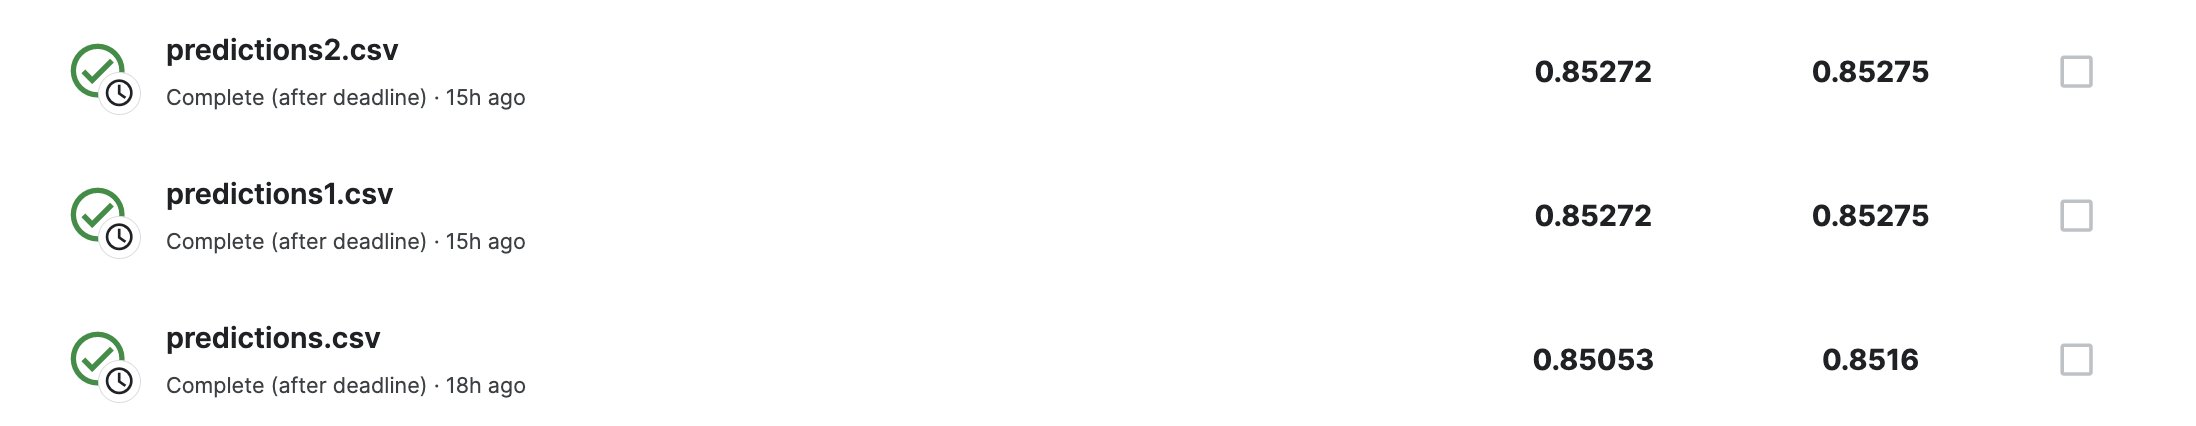